In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_csv(r'C:\Users\User\Desktop\sample\healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [113]:
df.drop(['id'], inplace=True, axis=1)

In [115]:
df.duplicated().sum()

0

<Axes: >

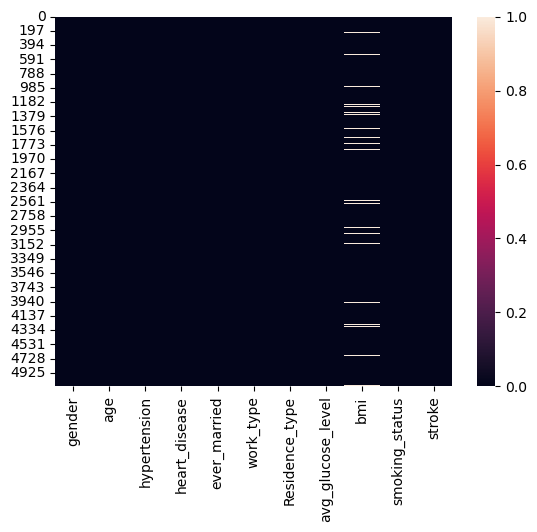

In [117]:
sns.heatmap(df.isnull())

In [118]:
for i in df.columns:
    print(f"{i}: {df[i].isnull().sum()}")

gender: 0
age: 0
hypertension: 0
heart_disease: 0
ever_married: 0
work_type: 0
Residence_type: 0
avg_glucose_level: 0
bmi: 201
smoking_status: 0
stroke: 0


In [119]:
df.shape

(5110, 11)

### Adding mean in missing values

In [121]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_3428\3594416367.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [122]:
df['bmi'].isnull().sum()

0

<Axes: >

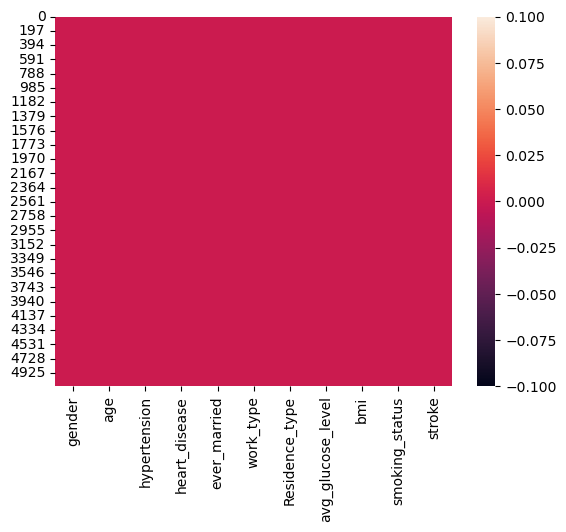

In [125]:
sns.heatmap(df.isnull())

In [129]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


<Axes: xlabel='work_type', ylabel='count'>

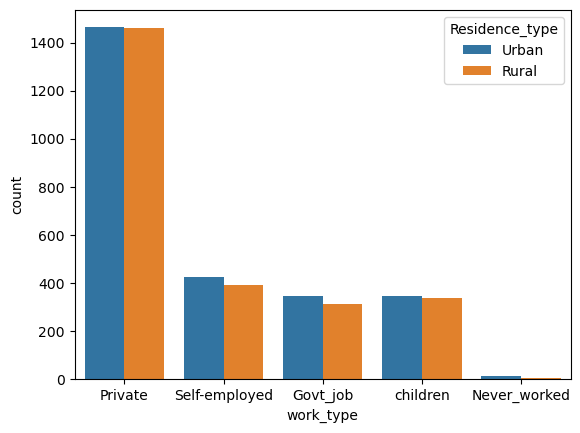

In [130]:
sns.countplot(df, x='work_type', hue='Residence_type')

<Axes: xlabel='smoking_status', ylabel='count'>

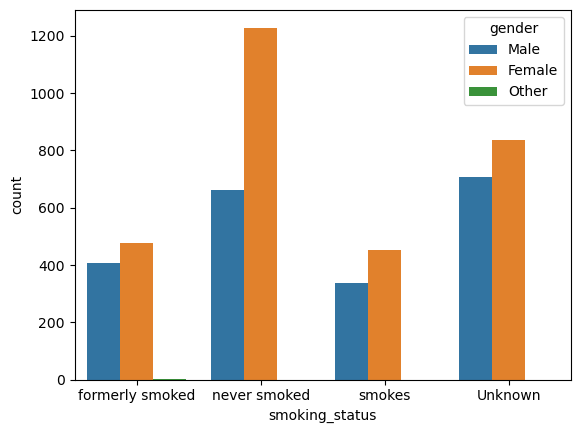

In [134]:
sns.countplot(df, x='smoking_status', hue='gender')

<Axes: xlabel='heart_disease', ylabel='count'>

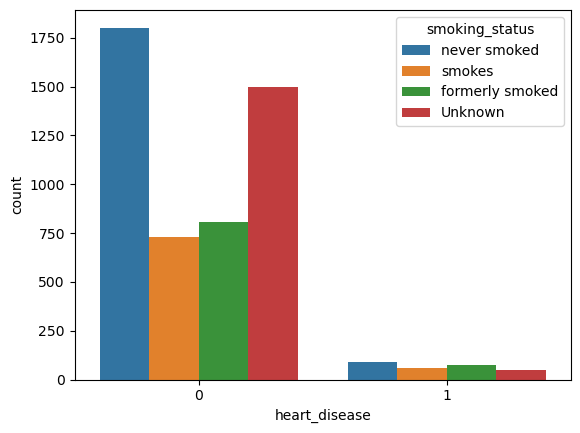

In [136]:
sns.countplot(df, x='heart_disease', hue='smoking_status')

In [23]:
df['work_type'].value_counts()
    

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [24]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [25]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
encoder = OneHotEncoder(sparse_output=False, dtype=np.int32)

In [28]:
new_values = encoder.fit_transform(df[['work_type', 'Residence_type', 'smoking_status']])
new_values

array([[0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [29]:
features = encoder.get_feature_names_out(['work_type', 'Residence_type', 'smoking_status'])
features

array(['work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'], dtype=object)

In [30]:
one_hot_df = pd.DataFrame(new_values, 
                          columns=features)

In [31]:
one_hot_df

,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,0,1,0,0,0,1,0,1,0,0
1,0,0,0,1,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,1,0,0,0,1
4,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,0,1,0,0,0,1,0,0,1,0
5106,0,0,0,1,0,0,1,0,0,1,0
5107,0,0,0,1,0,1,0,0,0,1,0
5108,0,0,1,0,0,1,0,0,1,0,0


<Axes: >

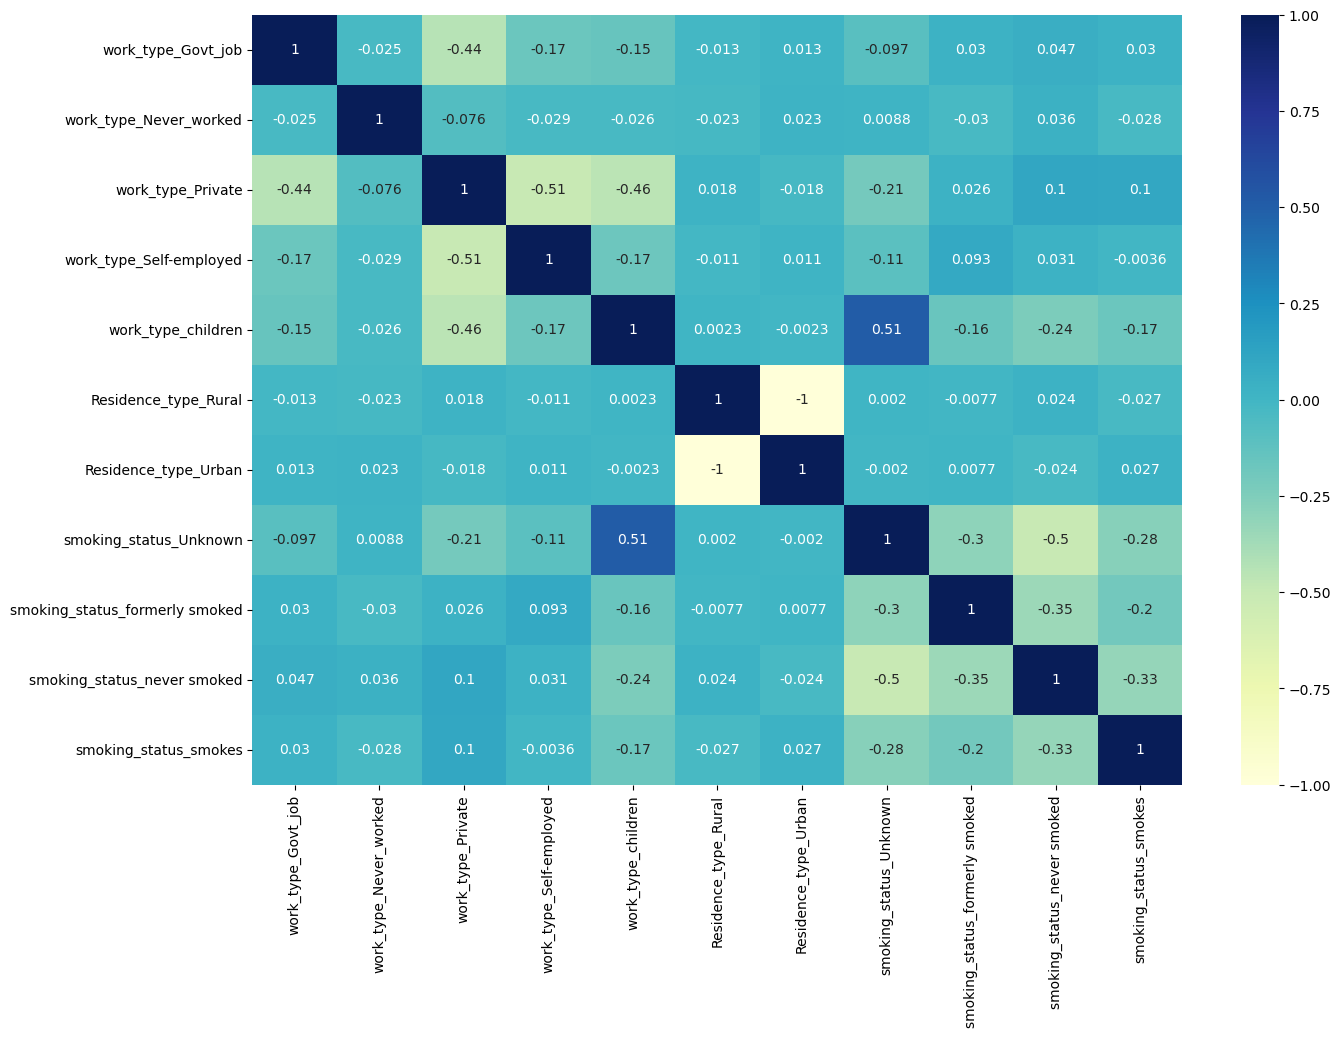

In [32]:
plt.figure(figsize=(15, 10))
sns.heatmap(one_hot_df.corr(), annot=True, cmap='YlGnBu')

In [33]:
df.drop(['work_type', 'Residence_type', 'smoking_status'], inplace=True, axis=1)

In [34]:
df

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
0,Male,67.0,0,1,Yes,228.69,36.600000,1
1,Female,61.0,0,0,Yes,202.21,28.893237,1
2,Male,80.0,0,1,Yes,105.92,32.500000,1
3,Female,49.0,0,0,Yes,171.23,34.400000,1
4,Female,79.0,1,0,Yes,174.12,24.000000,1
...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,83.75,28.893237,0
5106,Female,81.0,0,0,Yes,125.20,40.000000,0
5107,Female,35.0,0,0,Yes,82.99,30.600000,0
5108,Male,51.0,0,0,Yes,166.29,25.600000,0


In [35]:
df = pd.concat([df, one_hot_df], axis=1)

In [36]:
df

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,Yes,228.69,36.600000,1,0,0,1,0,0,0,1,0,1,0,0
1,Female,61.0,0,0,Yes,202.21,28.893237,1,0,0,0,1,0,1,0,0,0,1,0
2,Male,80.0,0,1,Yes,105.92,32.500000,1,0,0,1,0,0,1,0,0,0,1,0
3,Female,49.0,0,0,Yes,171.23,34.400000,1,0,0,1,0,0,0,1,0,0,0,1
4,Female,79.0,1,0,Yes,174.12,24.000000,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,83.75,28.893237,0,0,0,1,0,0,0,1,0,0,1,0
5106,Female,81.0,0,0,Yes,125.20,40.000000,0,0,0,0,1,0,0,1,0,0,1,0
5107,Female,35.0,0,0,Yes,82.99,30.600000,0,0,0,0,1,0,1,0,0,0,1,0
5108,Male,51.0,0,0,Yes,166.29,25.600000,0,0,0,1,0,0,1,0,0,1,0,0


In [37]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder2 = LabelEncoder()


In [42]:
gender = label_encoder.fit_transform(df['gender'])
gender

array([1, 0, 1, ..., 0, 1, 0])

In [62]:
gender_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
gender_map

{'Female': 0, 'Male': 1, 'Other': 2}

In [63]:
married = label_encoder2.fit_transform(df['ever_married'])
married

array([1, 1, 1, ..., 1, 1, 1])

In [64]:
married_map = dict(zip(label_encoder2.classes_, label_encoder2.transform(label_encoder2.classes_)))
married_map

{'No': 0, 'Yes': 1}

In [65]:
df['ever_married'] = married
df['gender'] = gender

In [69]:
df

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,1,0,0
1,0,61.0,0,0,1,202.21,28.893237,1,0,0,0,1,0,1,0,0,0,1,0
2,1,80.0,0,1,1,105.92,32.500000,1,0,0,1,0,0,1,0,0,0,1,0
3,0,49.0,0,0,1,171.23,34.400000,1,0,0,1,0,0,0,1,0,0,0,1
4,0,79.0,1,0,1,174.12,24.000000,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,83.75,28.893237,0,0,0,1,0,0,0,1,0,0,1,0
5106,0,81.0,0,0,1,125.20,40.000000,0,0,0,0,1,0,0,1,0,0,1,0
5107,0,35.0,0,0,1,82.99,30.600000,0,0,0,0,1,0,1,0,0,0,1,0
5108,1,51.0,0,0,1,166.29,25.600000,0,0,0,1,0,0,1,0,0,1,0,0


In [73]:
op = df['stroke']
df.drop('stroke', inplace=True, axis=1)
df['stroke'] = op

In [75]:
df

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1,67.0,0,1,1,228.69,36.600000,0,0,1,0,0,0,1,0,1,0,0,1
1,0,61.0,0,0,1,202.21,28.893237,0,0,0,1,0,1,0,0,0,1,0,1
2,1,80.0,0,1,1,105.92,32.500000,0,0,1,0,0,1,0,0,0,1,0,1
3,0,49.0,0,0,1,171.23,34.400000,0,0,1,0,0,0,1,0,0,0,1,1
4,0,79.0,1,0,1,174.12,24.000000,0,0,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,83.75,28.893237,0,0,1,0,0,0,1,0,0,1,0,0
5106,0,81.0,0,0,1,125.20,40.000000,0,0,0,1,0,0,1,0,0,1,0,0
5107,0,35.0,0,0,1,82.99,30.600000,0,0,0,1,0,1,0,0,0,1,0,0
5108,1,51.0,0,0,1,166.29,25.600000,0,0,1,0,0,1,0,0,1,0,0,0


In [76]:
df.duplicated().sum()

0

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [80]:
from imblearn.over_sampling import SMOTE
from collections import Counter



In [85]:
%%time
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=50)
X_train, y_train = smote.fit_resample(X_train, y_train)

CPU times: total: 188 ms
Wall time: 1.82 s


In [86]:
%%time
smote2 = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=50)
X_test, y_test = smote.fit_resample(X_test, y_test)

CPU times: total: 31.2 ms
Wall time: 55.3 ms


In [88]:
print("Class distribution after SMOTE:", Counter(y_train))

Class distribution after SMOTE: Counter({0: 3256, 1: 3256})


In [90]:
print("Class Distrib: ", Counter(y_test))

Class Distrib:  Counter({0: 1605, 1: 1605})


In [93]:
X_train

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,68.000000,0,0,1,92.210000,27.300000,0,0,1,0,0,0,1,1,0,0,0
1,0,19.000000,0,0,0,110.700000,38.500000,0,0,1,0,0,0,1,0,0,1,0
2,1,69.000000,0,0,1,202.510000,30.800000,0,0,0,1,0,0,1,0,1,0,0
3,0,27.000000,0,0,1,57.460000,23.000000,0,0,1,0,0,0,1,0,0,0,1
4,0,1.880000,0,0,0,97.260000,16.700000,0,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,0,54.403965,0,0,1,91.642640,28.948203,0,0,1,0,0,0,0,0,0,0,0
6508,0,67.218662,0,0,1,92.057788,27.160483,0,0,0,0,0,0,1,0,0,0,0
6509,0,53.617832,0,0,1,63.618850,30.126171,0,0,1,0,0,0,1,1,0,0,0
6510,0,60.113218,0,0,0,107.460387,31.393915,0,0,0,0,0,0,1,0,0,0,0


In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [222]:
accuracy_dct = {'model':[], 'accuracy':[], 'trained_model': []}

In [223]:
models_dct = {
    'Log_Reg': LogisticRegression(),
    'Ran_For' : RandomForestClassifier(),
    'Dec_Tree': DecisionTreeClassifier(),
    'KNeig': KNeighborsClassifier()
}

In [224]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [225]:
def plot_cf(cm, algo):
    sns.heatmap(cm, annot=True, xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'], cmap='Blues')
    plt.title(f"{algo}'s Confusion matrix")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Label')
    plt.show()

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9255451713395638
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1605
           1       0.95      0.90      0.92      1605

    accuracy                           0.93      3210
   macro avg       0.93      0.93      0.93      3210
weighted avg       0.93      0.93      0.93      3210



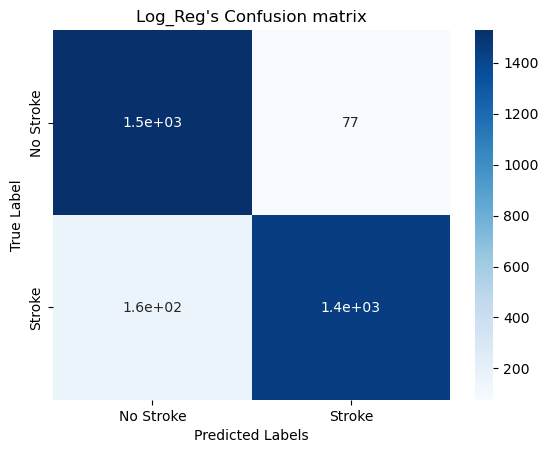

0.9146417445482866
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1605
           1       0.97      0.86      0.91      1605

    accuracy                           0.91      3210
   macro avg       0.92      0.91      0.91      3210
weighted avg       0.92      0.91      0.91      3210



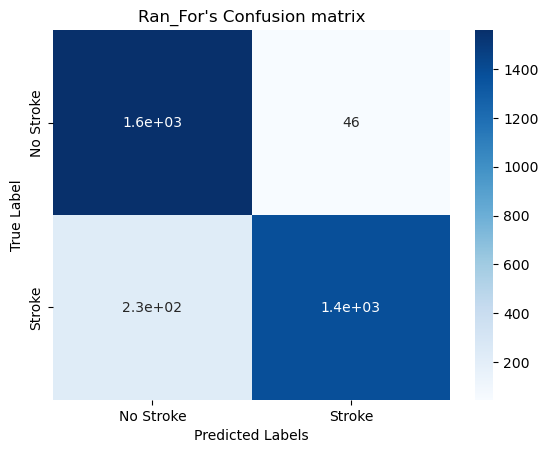

0.8635514018691589
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1605
           1       0.91      0.80      0.86      1605

    accuracy                           0.86      3210
   macro avg       0.87      0.86      0.86      3210
weighted avg       0.87      0.86      0.86      3210



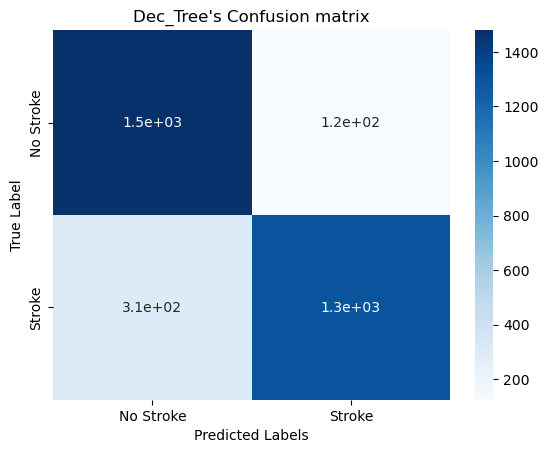

0.7635514018691589
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1605
           1       0.75      0.78      0.77      1605

    accuracy                           0.76      3210
   macro avg       0.76      0.76      0.76      3210
weighted avg       0.76      0.76      0.76      3210



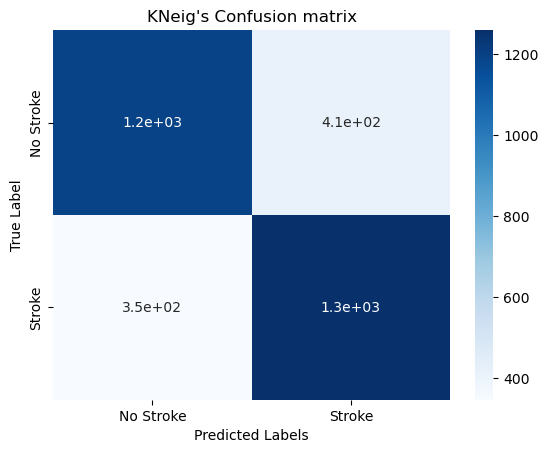

In [226]:
for model in models_dct:

    current_model = models_dct[model]
    current_model.fit(X_train, y_train)

    pred = current_model.predict(X_test)
    acc = accuracy_score(y_test, pred)

    accuracy_dct['model'].append(model)
    accuracy_dct['accuracy'].append(acc)
    accuracy_dct['trained_model'].append(current_model)

    print(acc)
    print(classification_report(y_test, pred))
    plot_cf(confusion_matrix(y_test, pred), model)

In [227]:
accuracy_df = pd.DataFrame(accuracy_dct)

In [229]:
accuracy_df

,model,accuracy,trained_model
0,Log_Reg,0.925545,LogisticRegression()
1,Ran_For,0.914642,"(DecisionTreeClassifier(max_features='sqrt', r..."
2,Dec_Tree,0.863551,DecisionTreeClassifier()
3,KNeig,0.763551,KNeighborsClassifier()


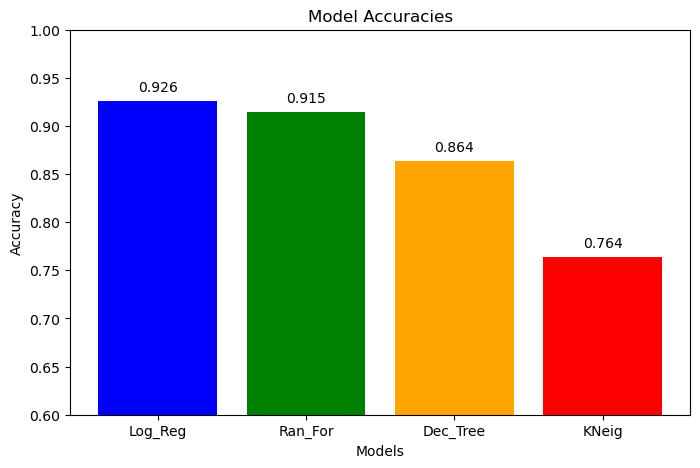

In [230]:
import matplotlib.pyplot as plt


# Create the bar graph
plt.figure(figsize=(8, 5))
plt.bar(accuracy_df['model'],accuracy_df['accuracy'], color=['blue', 'green', 'orange', 'red'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0.6, 1)  # Set y-axis limit to make it clear that accuracy ranges between 0 and 1

# Annotate bars with accuracy values
for i, acc in enumerate(accuracy_df['accuracy']):
    plt.text(i, acc + 0.01, f'{acc:.3f}', ha='center', fontsize=10)

# Show the plot
plt.show()


In [231]:
import joblib

In [233]:
joblib.dump(accuracy_df['trained_model'][0], 'lr_model.pkl')
print("Logistic regresssion saved as 'lr_model.pkl'.")

Logistic regresssion saved as 'lr_model.pkl'.


In [234]:
import os

In [237]:

gender_map = {'female': 0, 'male': 1}
work_type_map = {'private': 0, 'self_employeed': 1, 'govt_job': 2, 'children': 3, 'never woeked':4}
residence_type_map = {'urban': 0, 'rural': 1}
smoking_status_map = {'formerly smoked': 0, 'never smoked': 1, 'unknown': 2, 'smokes': 3}
ever_married_map = {'yes': 1, 'no': 0}

In [239]:

model_path = 'rf_model.pkl'
if not os.path.exists(model_path):
    print(f"Error: Model file '{model_path}' not found. Train the model first.")
else:
    model = joblib.load(model_path)

In [241]:
def preprocess_input(user_input):
   
    user_input['gender'] = gender_map.get(user_input['gender'], 0)  
    user_input['work_type'] = work_type_map.get(user_input['work_type'], 0)  
    user_input['Residence_type'] = residence_type_map.get(user_input['Residence_type'], 0)  
    user_input['smoking_status'] = smoking_status_map.get(user_input['smoking_status'], 2)  
    user_input['ever_married'] = ever_married_map.get(user_input['ever_married'], 0)  

   
    user_input['bmi'] = 0 if pd.isna(user_input['bmi']) else user_input['bmi']
    user_input['age'] = 0 if pd.isna(user_input['age']) else user_input['age']
    user_input['avg_glucose_level'] = 0 if pd.isna(user_input['avg_glucose_level']) else user_input['avg_glucose_level']

   
    feature_names = joblib.load('feature_names.pkl')
    user_input_processed = pd.DataFrame([user_input], columns=feature_names)

    return user_input_processed


In [243]:
 def predict_stroke(user_input):
    model = joblib.load('rf_model.pkl')
    feature_names = joblib.load('feature_names.pkl')
    user_input_processed = preprocess_input(user_input)
    missing_features = set(feature_names) - set(user_input_processed.columns)
    if missing_features:
        raise ValueError(f"Missing features in user input: {missing_features}")   
    prediction = model.predict(user_input_processed)

    return "Stroke" if prediction[0] == 1 else "No Stroke"


In [245]:
def get_user_input():
    print("Please provide the following information:")

    gender = input("Gender (male/female): ").strip().lower()
    age = float(input("Age: "))
    hypertension = int(input("Hypertension (1 for Yes, 0 for No): "))
    heart_disease = int(input("Heart Disease (1 for Yes, 0 for No): "))
    work_type = input("Work Type (private/self_employeed/govt_job/children/never_worked): ").strip().lower()
    residence_type = input("Residence Type (urban/rural): ").strip().lower()
    avg_glucose_level = float(input("Average Glucose Level: "))
    bmi = float(input("BMI: "))
    smoking_status = input("Smoking Status (formerly smoked/never smoked/unknown/smokes): ").strip().lower()
    ever_married = input("Ever Married (yes/no): ").strip().lower()

    return {
        'gender': gender,
        'age': age,
        'hypertension': hypertension,
        'heart_disease': heart_disease,
        'work_type': work_type,
        'Residence_type': residence_type,
        'avg_glucose_level': avg_glucose_level,
        'bmi': bmi,
        'smoking_status': smoking_status,
        'ever_married': ever_married
    }

In [ ]:
if __name__ == "__main__":
    user_input = get_user_input()
    result = predict_stroke(user_input)
    print(f"The prediction for the user is: {result}")

Please provide the following information:
